In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df_jantung = pd.read_csv("Data_Poli_Jantung.csv", encoding="latin1")
df_jantung.head()

,NO,PERIODE,TANGGAL,NO. REG,NO. MR,NAMA PASIEN,KEL UMUR,JKEL,L,P,KUNJUNGAN,KASUS,DIAGNOSA,DOKTER,POLI,PENJAMIN
0,1,1. JANUARI,1/16/2024,RJ2401160286,281635,HILMA NABILA,5-14th,P,NaN,12 Th,Lama,1. LAMA,"1. (I09.9) - Rheumatic heart disease, unspecified","dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN
1,2,1. JANUARI,1/24/2024,RJ2401240268,278086,ROSDIANA,5-14th,P,NaN,14 Th,Lama,1. LAMA,1. (R06.0) - Dyspnoea,"dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN
2,3,1. JANUARI,1/4/2024,RJ2401040340,279540,FIRDA SYAKILA,15-24th,P,NaN,17 Th,Lama,1. BARU,1. (Q25.8) - Other congenital malformations of...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN
3,4,1. JANUARI,1/8/2024,RJ2401080269,275631,SITI AISAH,15-24th,P,NaN,20 Th,Lama,1. LAMA,1. (Z09.8) - Follow-up exam after other treatm...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN
4,5,1. JANUARI,1/13/2024,RJ2401130052,518975,METI MARTIANI LESTARI,15-24th,P,NaN,21 Th,Lama,1. BARU,1. (I50) - Heart failure,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN


In [3]:
# Buat kolom baru 'UMUR' berdasarkan jenis kelamin
df_jantung["UMUR"] = df_jantung.apply(lambda row: row["L"] if row["JKEL"] == "L" else row["P"], axis=1)

# Hapus kolom L dan P setelah penggabungan
df_jantung = df_jantung.drop(columns=["L", "P", "KEL UMUR"])

# Cek hasil perubahan
df_jantung.head()

,NO,PERIODE,TANGGAL,NO. REG,NO. MR,NAMA PASIEN,JKEL,KUNJUNGAN,KASUS,DIAGNOSA,DOKTER,POLI,PENJAMIN,UMUR
0,1,1. JANUARI,1/16/2024,RJ2401160286,281635,HILMA NABILA,P,Lama,1. LAMA,"1. (I09.9) - Rheumatic heart disease, unspecified","dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,12 Th
1,2,1. JANUARI,1/24/2024,RJ2401240268,278086,ROSDIANA,P,Lama,1. LAMA,1. (R06.0) - Dyspnoea,"dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,14 Th
2,3,1. JANUARI,1/4/2024,RJ2401040340,279540,FIRDA SYAKILA,P,Lama,1. BARU,1. (Q25.8) - Other congenital malformations of...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,17 Th
3,4,1. JANUARI,1/8/2024,RJ2401080269,275631,SITI AISAH,P,Lama,1. LAMA,1. (Z09.8) - Follow-up exam after other treatm...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,20 Th
4,5,1. JANUARI,1/13/2024,RJ2401130052,518975,METI MARTIANI LESTARI,P,Lama,1. BARU,1. (I50) - Heart failure,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,21 Th


In [4]:
# Fungsi untuk memberi label penyakit jantung (1) atau bukan (0)
def label_penyakit(diagnosa):
    diagnosa = str(diagnosa)  # Pastikan format string
    if "(I" in diagnosa:  # Jika kode penyakit diawali dengan 'I' (penyakit jantung)
        return 1
    return 0  # Selain itu dianggap bukan penyakit jantung

# Tambahkan kolom label ke DataFrame
df_jantung["LABEL"] = df_jantung["DIAGNOSA"].apply(label_penyakit)

# Cek distribusi label
df_jantung["LABEL"].value_counts()
df_jantung.head()

,NO,PERIODE,TANGGAL,NO. REG,NO. MR,NAMA PASIEN,JKEL,KUNJUNGAN,KASUS,DIAGNOSA,DOKTER,POLI,PENJAMIN,UMUR,LABEL
0,1,1. JANUARI,1/16/2024,RJ2401160286,281635,HILMA NABILA,P,Lama,1. LAMA,"1. (I09.9) - Rheumatic heart disease, unspecified","dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,12 Th,1
1,2,1. JANUARI,1/24/2024,RJ2401240268,278086,ROSDIANA,P,Lama,1. LAMA,1. (R06.0) - Dyspnoea,"dr. Omar Mokhtar Siregar, Sp.JP",Jantung & Pembuluh Darah,BPJS KESEHATAN,14 Th,0
2,3,1. JANUARI,1/4/2024,RJ2401040340,279540,FIRDA SYAKILA,P,Lama,1. BARU,1. (Q25.8) - Other congenital malformations of...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,17 Th,0
3,4,1. JANUARI,1/8/2024,RJ2401080269,275631,SITI AISAH,P,Lama,1. LAMA,1. (Z09.8) - Follow-up exam after other treatm...,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,20 Th,0
4,5,1. JANUARI,1/13/2024,RJ2401130052,518975,METI MARTIANI LESTARI,P,Lama,1. BARU,1. (I50) - Heart failure,"dr. Ivan Noersyid, Sp,Jp.",Jantung & Pembuluh Darah,BPJS KESEHATAN,21 Th,1


In [5]:
df_jantung = df_jantung.drop(columns=['NO', 'PERIODE', 'NO. MR', 'NO. REG', 'NAMA PASIEN', 'TANGGAL', 'DIAGNOSA', 'DOKTER', 'POLI','PENJAMIN'])
df_jantung.head()

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,1. LAMA,12 Th,1
1,P,Lama,1. LAMA,14 Th,0
2,P,Lama,1. BARU,17 Th,0
3,P,Lama,1. LAMA,20 Th,0
4,P,Lama,1. BARU,21 Th,1


In [6]:
# Menghapus angka "1." di awal teks kolom "KASUS"
df_jantung["KASUS"] = df_jantung["KASUS"].str.replace(r"^1\. ", "", regex=True)
df_jantung.head()

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,LAMA,12 Th,1
1,P,Lama,LAMA,14 Th,0
2,P,Lama,BARU,17 Th,0
3,P,Lama,LAMA,20 Th,0
4,P,Lama,BARU,21 Th,1


In [7]:
df_jantung["KASUS"] = (
    df_jantung["KASUS"]
    .str.replace(r"\d+\.", "", regex=True)  # Hapus angka dan titik di awal
    .str.strip()                            # Hapus spasi di awal dan akhir
    .str.capitalize()
)
df_jantung.head()

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,Lama,12 Th,1
1,P,Lama,Lama,14 Th,0
2,P,Lama,Baru,17 Th,0
3,P,Lama,Lama,20 Th,0
4,P,Lama,Baru,21 Th,1


In [8]:
df_jantung['UMUR'] = df_jantung['UMUR'].str.extract('(\d+)').astype(float)
df_jantung.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ARBAI KYB\AppData\Local\Temp\ipykernel_1360\1818613242.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_jantung['UMUR'] = df_jantung['UMUR'].str.extract('(\d+)').astype(float)


,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,P,Lama,Lama,12.0,1
1,P,Lama,Lama,14.0,0
2,P,Lama,Baru,17.0,0
3,P,Lama,Lama,20.0,0
4,P,Lama,Baru,21.0,1


In [9]:
df_jantung.shape

(5921, 5)

In [10]:
df_jantung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   JKEL       5921 non-null   object 
 1   KUNJUNGAN  5921 non-null   object 
 2   KASUS      5568 non-null   object 
 3   UMUR       5906 non-null   float64
 4   LABEL      5921 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 231.4+ KB


In [11]:
df_jantung.isnull().sum()

JKEL           0
KUNJUNGAN      0
KASUS        353
UMUR          15
LABEL          0
dtype: int64

In [12]:
df_jantung = df_jantung.dropna(subset=['UMUR', 'KASUS'])

In [13]:
df_jantung.isnull().sum()

JKEL         0
KUNJUNGAN    0
KASUS        0
UMUR         0
LABEL        0
dtype: int64

In [14]:
df_jantung.describe()

,UMUR,LABEL
count,5555.000000,5555.000000
mean,54.730873,0.560036
std,12.694796,0.496427
min,1.000000,0.000000
25%,47.000000,0.000000
50%,56.000000,1.000000
75%,63.000000,1.000000
max,89.000000,1.000000


In [15]:
le = LabelEncoder()
for col in ['JKEL', 'KUNJUNGAN', 'KASUS']:
    df_jantung[col] = le.fit_transform(df_jantung[col])

df_jantung

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
0,1,1,1,12.0,1
1,1,1,1,14.0,0
2,1,1,0,17.0,0
3,1,1,1,20.0,0
4,1,1,0,21.0,1
...,...,...,...,...,...
5915,1,1,1,41.0,0
5916,1,1,1,41.0,0
5917,1,1,1,59.0,1
5918,1,1,1,59.0,0


In [16]:
df_jantung.describe()

,JKEL,KUNJUNGAN,KASUS,UMUR,LABEL
count,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000
mean,0.565977,0.976418,0.700990,54.730873,0.560036
std,0.495673,0.151758,0.457865,12.694796,0.496427
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,47.000000,0.000000
50%,1.000000,1.000000,1.000000,56.000000,1.000000
75%,1.000000,1.000000,1.000000,63.000000,1.000000
max,1.000000,1.000000,1.000000,89.000000,1.000000


Text(0.5, 1.0, 'Korelasi Antar Fitur')

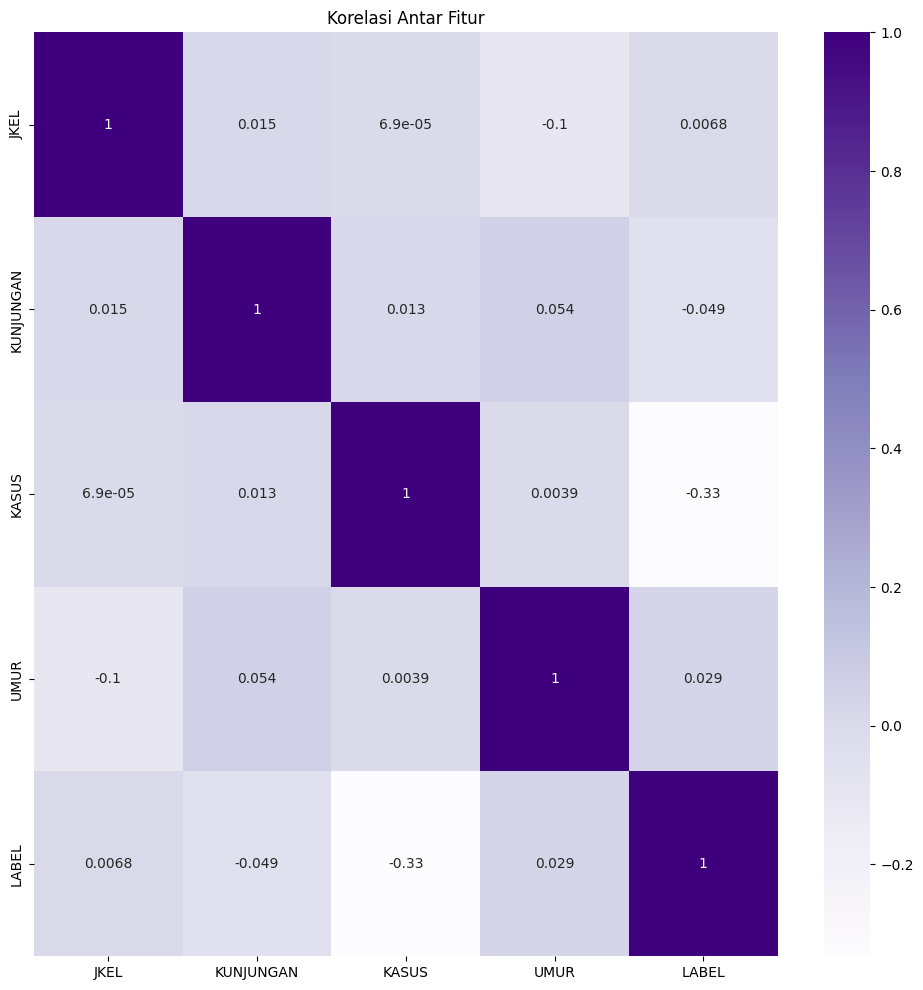

In [17]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat=df_jantung.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, annot=True, cmap='Purples')
plt.title('Korelasi Antar Fitur')

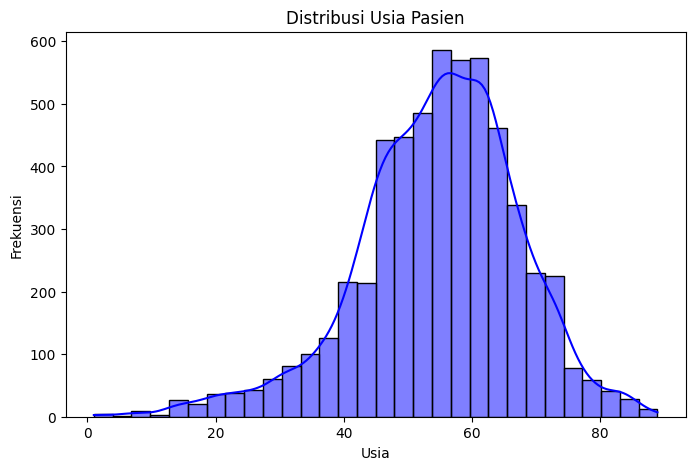

In [18]:
# Distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df_jantung['UMUR'], bins=30, color="blue", kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


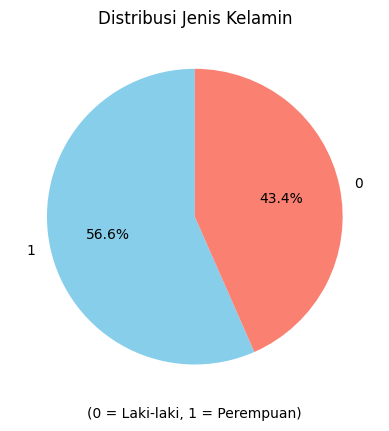

In [19]:
df_jantung["JKEL"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "salmon"], startangle=90)
plt.title("Distribusi Jenis Kelamin")
plt.xlabel("(0 = Laki-laki, 1 = Perempuan)")
plt.ylabel("") 
plt.show()

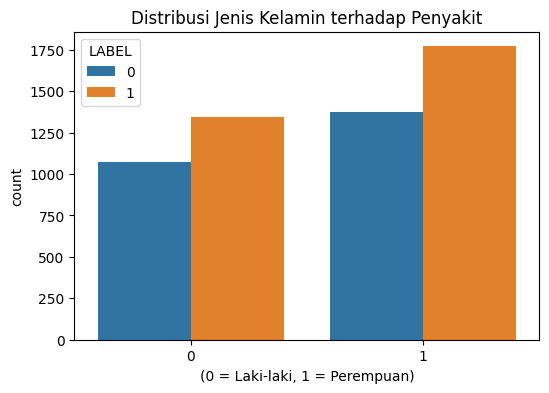

In [20]:
# Perbandingan jenis kelamin terhadap label penyakit
plt.figure(figsize=(6, 4))
sns.countplot(x='JKEL', hue='LABEL', data=df_jantung)
plt.title('Distribusi Jenis Kelamin terhadap Penyakit')
plt.xlabel("(0 = Laki-laki, 1 = Perempuan)")
plt.show()

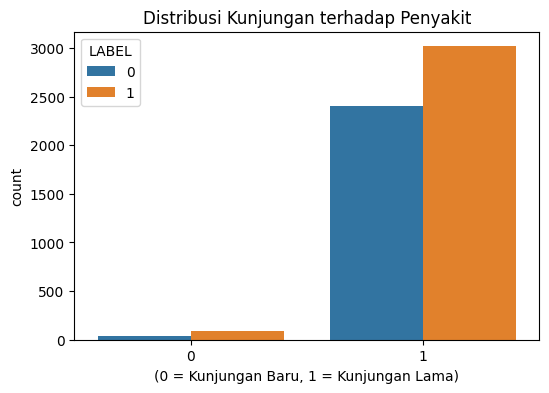

In [21]:
# Perbandingan kunjungan terhadap label penyakit
plt.figure(figsize=(6, 4))
sns.countplot(x='KUNJUNGAN', hue='LABEL', data=df_jantung)
plt.xlabel("(0 = Kunjungan Baru, 1 = Kunjungan Lama)")
plt.title('Distribusi Kunjungan terhadap Penyakit')
plt.show()

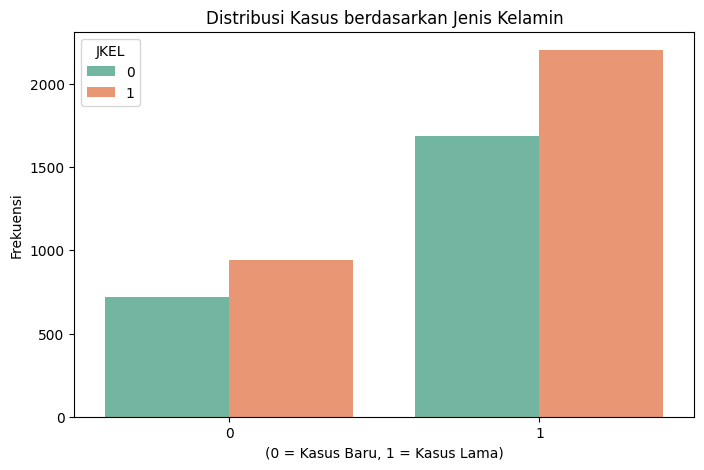

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_jantung, x="KASUS", hue="JKEL", palette="Set2")
plt.title("Distribusi Kasus berdasarkan Jenis Kelamin")
plt.xlabel("(0 = Kasus Baru, 1 = Kasus Lama)")
plt.ylabel("Frekuensi")
plt.show()

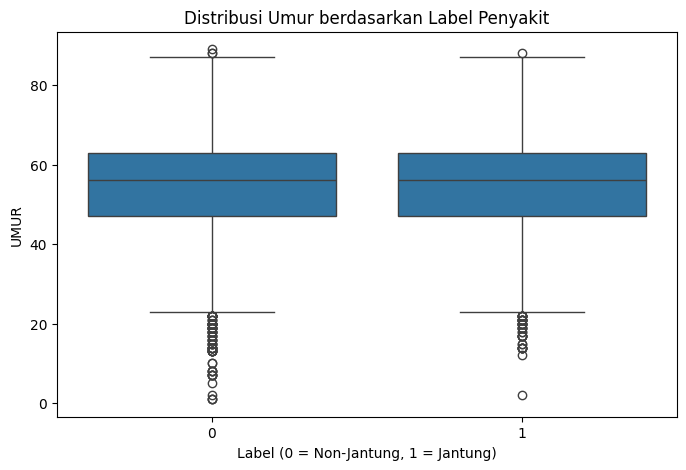

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='LABEL', y='UMUR', data=df_jantung)
plt.title('Distribusi Umur berdasarkan Label Penyakit')
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.show()

LABEL
1    3111
0    2444
Name: count, dtype: int64
LABEL
1    56.0036
0    43.9964
Name: proportion, dtype: float64


C:\Users\ARBAI KYB\AppData\Local\Temp\ipykernel_1360\2024822706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_jantung['LABEL'], palette="viridis")


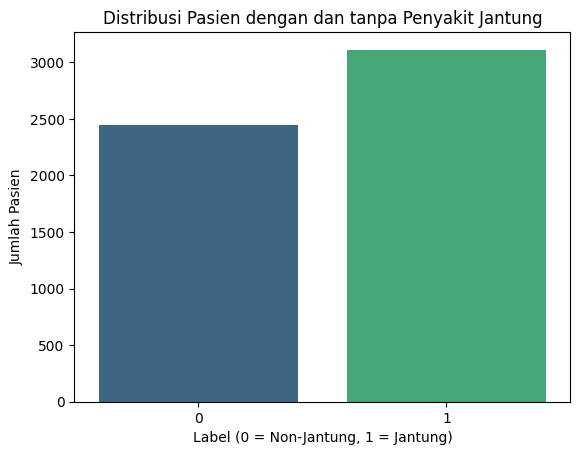

In [24]:
print(df_jantung['LABEL'].value_counts())
print(df_jantung['LABEL'].value_counts(normalize=True) * 100) 


sns.countplot(x=df_jantung['LABEL'], palette="viridis")
plt.title("Distribusi Pasien dengan dan tanpa Penyakit Jantung")
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.ylabel("Jumlah Pasien")
plt.show()

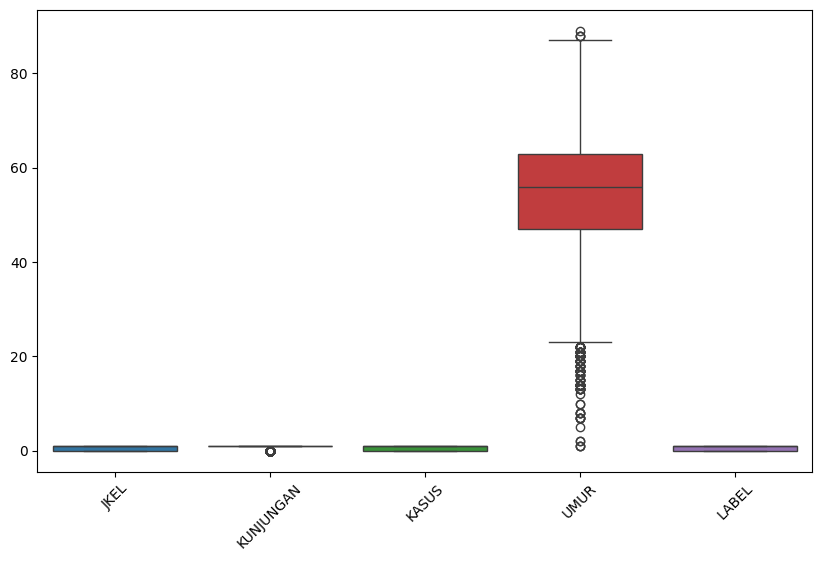

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_jantung)
plt.xticks(rotation=45)
plt.show()

Jumlah data sebelum menghapus outlier: 5555
Jumlah data setelah menghapus outlier: 5310


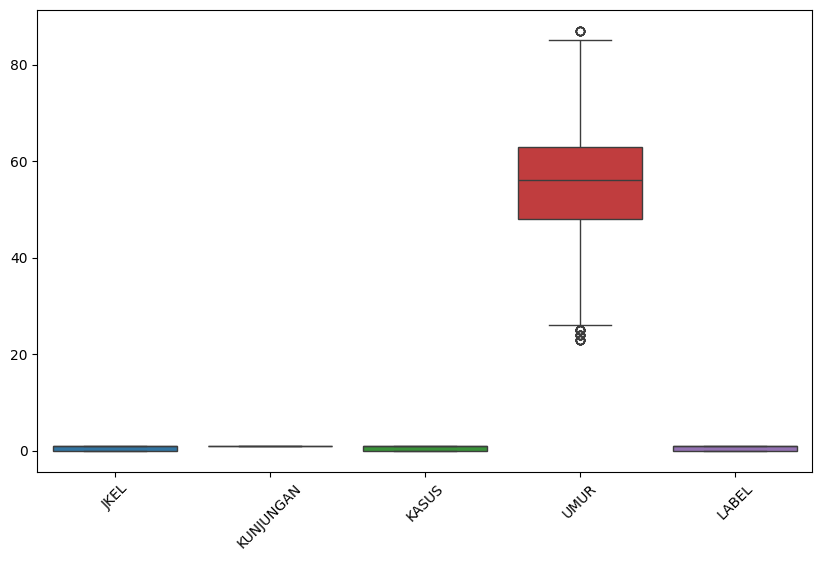

In [26]:
# Hitung Q1, Q3, dan IQR
Q1 = df_jantung.quantile(0.25)
Q3 = df_jantung.quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outlier (data di luar batas bawah & atas)
outlier_mask = (df_jantung < (Q1 - 1.5 * IQR)) | (df_jantung > (Q3 + 1.5 * IQR))

# Hapus baris yang memiliki setidaknya satu outlier
df_no_outliers = df_jantung[~outlier_mask.any(axis=1)]

# Tampilkan jumlah data sebelum & sesudah
print(f"Jumlah data sebelum menghapus outlier: {df_jantung.shape[0]}")
print(f"Jumlah data setelah menghapus outlier: {df_no_outliers.shape[0]}")

plt.figure(figsize=(10,6))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=45)
plt.show()


In [63]:
# Pisahkan fitur (X) dan target (y)
X = df_no_outliers.drop(columns=['LABEL'])  
y = df_no_outliers['LABEL']  

# Bagi data menjadi 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Cek hasil pembagian
print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train: 4248
Jumlah data test: 1062


In [64]:
scaler = StandardScaler()

features_to_scale = ['UMUR']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

Distribusi Label di Train Set: Counter({1: 2381, 0: 1867})


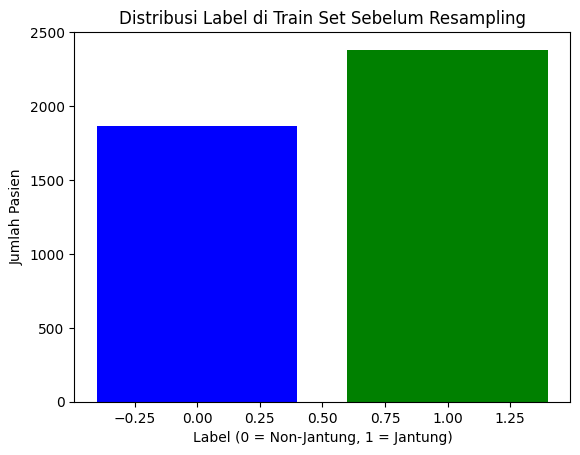

In [65]:
from collections import Counter

# Cek distribusi kelas pada train set
counter = Counter(y_train)  
print("Distribusi Label di Train Set:", counter)

# Visualisasi distribusi kelas
plt.bar(counter.keys(), counter.values(), color=['blue', 'green'])
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.ylabel("Jumlah Pasien")
plt.title("Distribusi Label di Train Set Sebelum Resampling")
plt.show()

Distribusi Label Setelah SMOTE: Counter({0: 2381, 1: 2381})


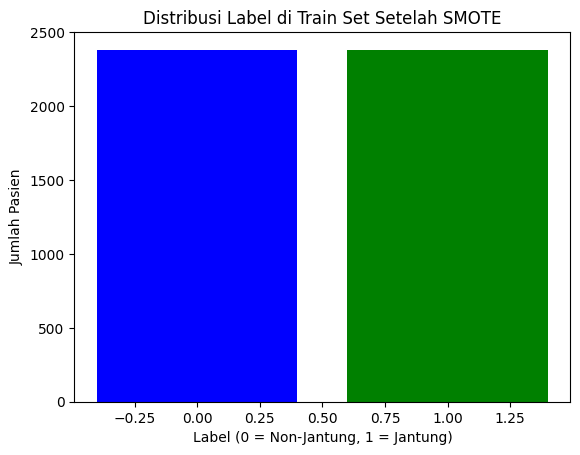

In [66]:
# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Terapkan SMOTE hanya pada train set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
counter_resampled = Counter(y_train_resampled)
print("Distribusi Label Setelah SMOTE:", counter_resampled)

# Visualisasi distribusi setelah SMOTE
plt.bar(counter_resampled.keys(), counter_resampled.values(), color=['blue', 'green'])
plt.xlabel("Label (0 = Non-Jantung, 1 = Jantung)")
plt.ylabel("Jumlah Pasien")
plt.title("Distribusi Label di Train Set Setelah SMOTE")
plt.show()

In [67]:
# Pisahkan Kembali Fitur & Label Setelah SMOTE 
X_train_final = X_train_resampled
y_train_final = y_train_resampled            

# Cek Data Setelah Resampling
print("Jumlah data train setelah SMOTE:", X_train_final.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train setelah SMOTE: 4762
Jumlah data test: 1062


In [68]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_depth=None, random_state=42)
rf.fit(X_train_final, y_train_final)

RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)

In [69]:
y_pred_rf = rf.predict(X_test)

In [70]:
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.55      0.73      0.63       467
           1       0.72      0.52      0.61       595

    accuracy                           0.62      1062
   macro avg       0.63      0.63      0.62      1062
weighted avg       0.64      0.62      0.62      1062



In [47]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train_final, y_train_final)

SVC(C=10, random_state=42)

In [48]:
y_pred_svm = svm.predict(X_test)

In [50]:
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.56      0.88      0.68       467
           1       0.82      0.45      0.58       595

    accuracy                           0.64      1062
   macro avg       0.69      0.66      0.63      1062
weighted avg       0.71      0.64      0.62      1062



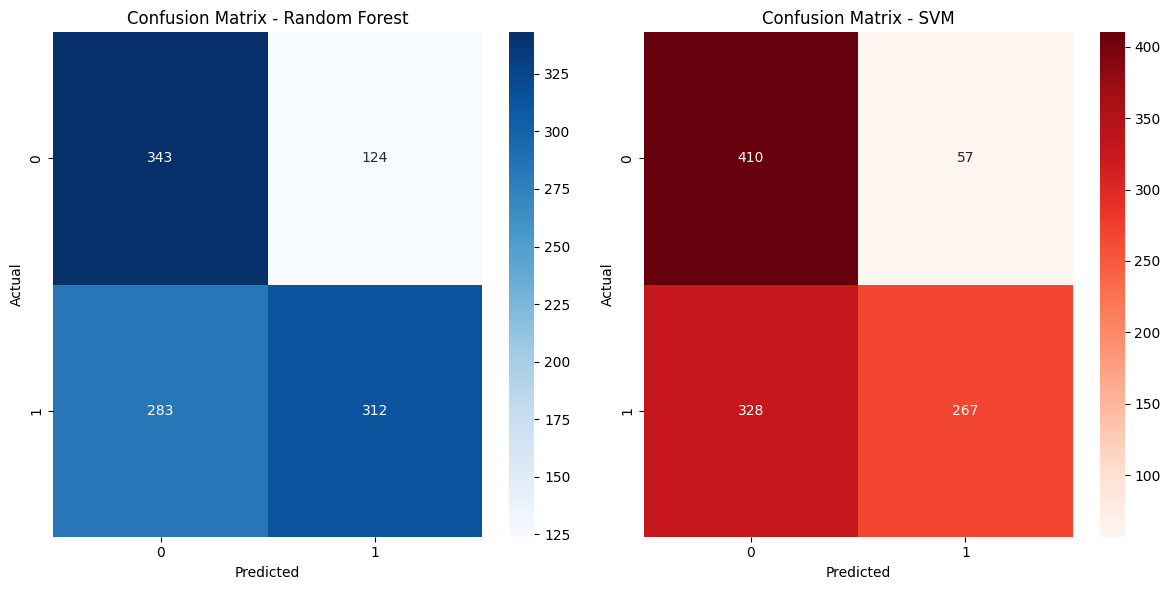

In [51]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [75]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_depth=None, random_state=42)
svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)

# Buat Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi dengan cross-validation
rf_scores = cross_val_score(rf_model, X_train_final, y_train_final, cv=skf, scoring='accuracy')
svm_scores = cross_val_score(svm_model, X_train_final, y_train_final, cv=skf, scoring='accuracy')

# Cetak hasil evaluasi
print("Random Forest Cross-Validation Accuracy:", rf_scores)
print("Mean Accuracy RF:", rf_scores.mean())

print("\nSVM Cross-Validation Accuracy:", svm_scores)
print("Mean Accuracy SVM:", svm_scores.mean())


Random Forest Cross-Validation Accuracy: [0.64847849 0.62854145 0.6355042  0.65231092 0.61869748]
Mean Accuracy RF: 0.636706508416588

SVM Cross-Validation Accuracy: [0.65897167 0.65162644 0.66911765 0.65546218 0.63865546]
Mean Accuracy SVM: 0.6547666810690698


In [76]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Evaluasi Random Forest
rf_cv_results = cross_validate(rf_model, X_train_final, y_train_final, cv=skf, scoring=scoring)
svm_cv_results = cross_validate(svm_model, X_train_final, y_train_final, cv=skf, scoring=scoring)

# Cetak hasil evaluasi
print("\n📊 Random Forest Cross-Validation Results:")
for metric in scoring:
    print(f"{metric}: {rf_cv_results['test_' + metric].mean():.4f}")

print("\n📊 SVM Cross-Validation Results:")
for metric in scoring:
    print(f"{metric}: {svm_cv_results['test_' + metric].mean():.4f}")



📊 Random Forest Cross-Validation Results:
accuracy: 0.6367
precision_weighted: 0.6455
recall_weighted: 0.6367
f1_weighted: 0.6310

📊 SVM Cross-Validation Results:
accuracy: 0.6548
precision_weighted: 0.6938
recall_weighted: 0.6548
f1_weighted: 0.6364


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_depth=None, random_state=42)
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42) 

# Gunakan StratifiedKFold agar distribusi kelas tetap seimbang di setiap fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi dengan Cross-Validation menggunakan ROC AUC
rf_roc_auc_scores = cross_val_score(rf_model, X_train_final, y_train_final, cv=skf, scoring='roc_auc')
svm_roc_auc_scores = cross_val_score(svm_model, X_train_final, y_train_final, cv=skf, scoring='roc_auc')

# Cetak hasil evaluasi
print(f"Random Forest Cross-Validation ROC AUC Scores: {rf_roc_auc_scores}")
print(f"Mean ROC AUC Random Forest: {rf_roc_auc_scores.mean():.4f}\n")

print(f"SVM Cross-Validation ROC AUC Scores: {svm_roc_auc_scores}")
print(f"Mean ROC AUC SVM: {svm_roc_auc_scores.mean():.4f}")

Random Forest Cross-Validation ROC AUC Scores: [0.67805613 0.68145403 0.68253257 0.67148992 0.65872158]
Mean ROC AUC Random Forest: 0.6745

SVM Cross-Validation ROC AUC Scores: [0.66558101 0.64103597 0.67467428 0.6739968  0.63681281]
Mean ROC AUC SVM: 0.6584


In [54]:
df_no_outliers.to_csv('poli_jantung_labeled.csv', index=False)
print("Dataset berhasil disimpan sebagai poli_jantung_labeled.csv")

Dataset berhasil disimpan sebagai poli_jantung_labeled.csv
